In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


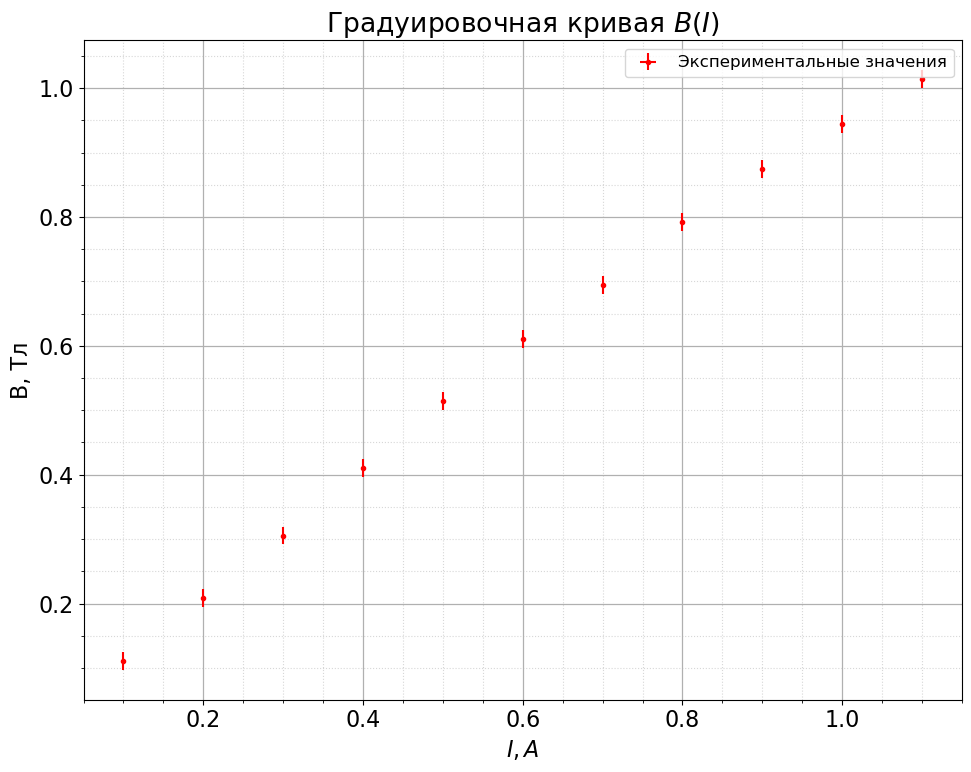

In [2]:
NS = 72 * 10**-4

mWb = [[[i[0], 0], countWithSigma(i[2] * 10**-3 / NS, [[i[2], 0.1]])] for i in pd.read_csv("data/mWb.csv").to_numpy()]

make_plot_experiment_values("img/grad.png", "Градуировочная кривая $B(I)$", "$I, А$", "B, Тл",
                            [i[0][0] for i in mWb], [i[1][0] for i in mWb], [i[0][1] for i in mWb], [i[1][1] for i in mWb])

In [3]:
def find_B_by_I(I):
    for i in mWb:
        if i[0][0] == I:
            return i[1]
    return np.inf

Mu_0 = 4 * 3.14 * 10**-7

k: (-320.0564312244025 +- 5.217700949234847)


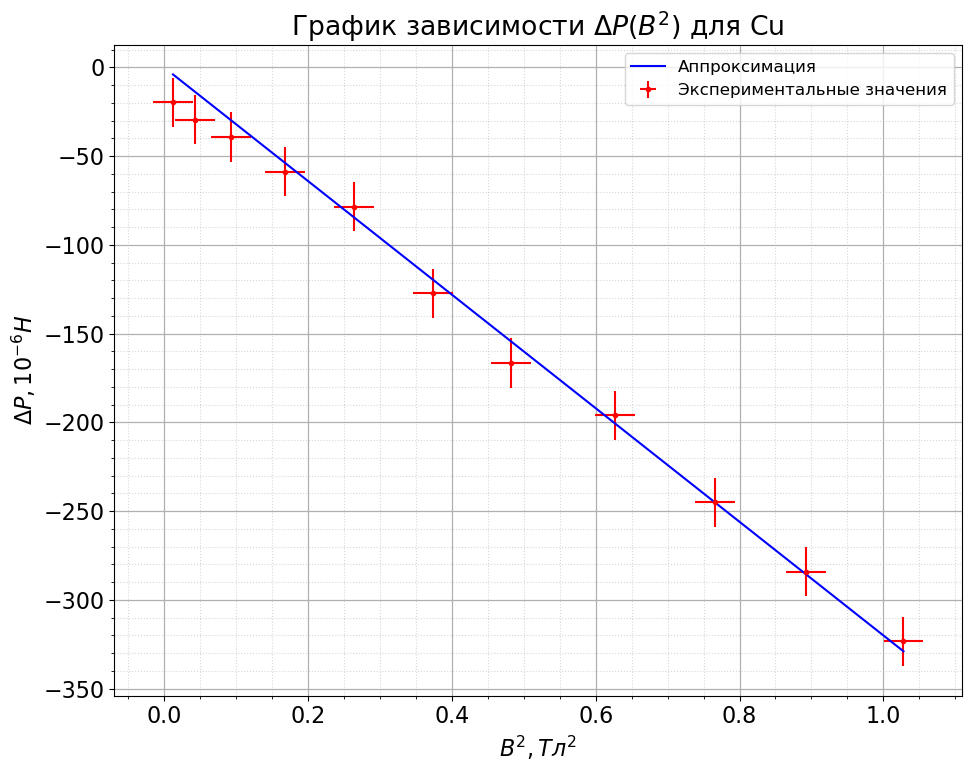

[np.float64(-1.0241805799180877e-05), np.float64(-1.6696643037551505e-07)]


In [4]:
# Cu
Cu_m   = [[[i[0], 0], [i[2] * 10**-3, 10**-3]] for i in pd.read_csv("data/Cu.csv").to_numpy()][:-1]
Cu_m_0 = [83.063, 0.001]
Cu_B_2 = [[find_B_by_I(i[0][0])[0]**2, 2*find_B_by_I(i[0][0])[1]] for i in Cu_m]
Cu_DP  = [[9.8 * (i[1][0] - Cu_m_0[0]), 9.8*np.sqrt(Cu_m_0[1]**2 + i[1][1]**2)] for i in Cu_m]

Cu_k = make_mnk_direct_prop("img/Cu.png", r"График зависимости $\Delta P(B^2)$ для Cu", r"$B^2, Тл^2$", r"$\Delta P, 10^{-6}Н$",
            [i[0] for i in Cu_B_2], [i[0] * 10**3 for i in Cu_DP], [i[1] for i in Cu_B_2], [i[1] * 10**3 for i in Cu_DP])

Cu_d = 0.01
Cu_Hi = countWithSigma(Cu_k[0] * 10**-6 * 2 * Mu_0 / (3.14 * (Cu_d / 2)**2), [Cu_k])
print(Cu_Hi)

k: (627.3923914688763 +- 3.2224953748572758)


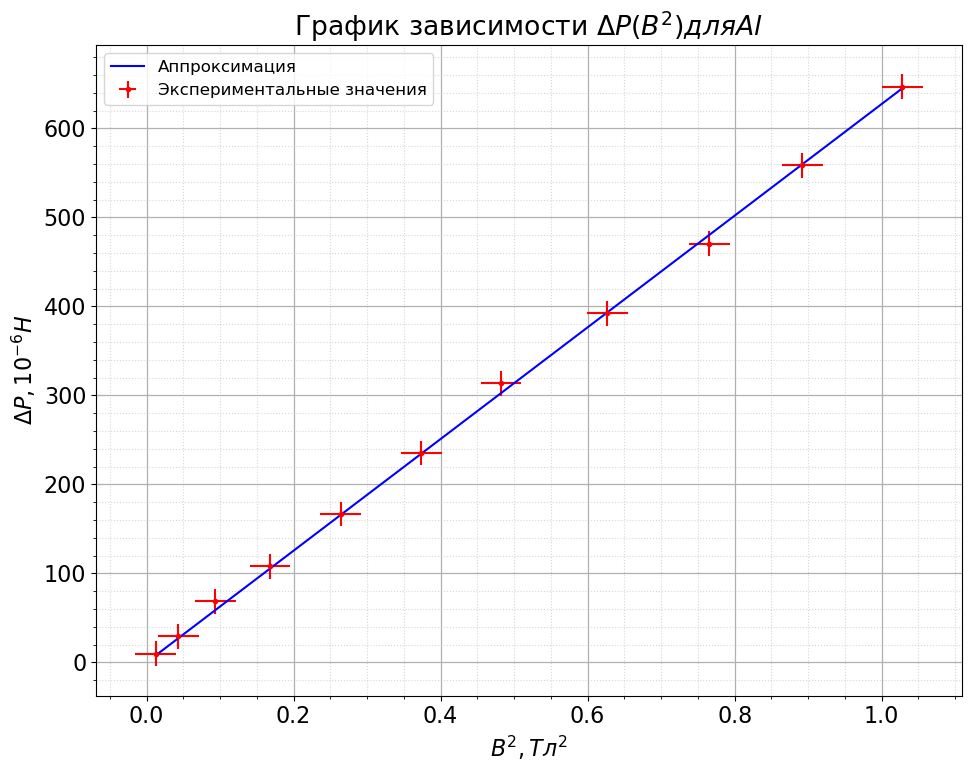

[np.float64(2.0076556527004035e-05), np.float64(1.0311985199543279e-07)]


In [5]:
# Al
Al_m   = [[[i[0], 0], [i[2] * 10**-3, 10**-3]] for i in pd.read_csv("data/Al.csv").to_numpy()][:-1]
Al_m_0 = [25.226, 0.001]
Al_B_2 = [[find_B_by_I(i[0][0])[0]**2, 2*find_B_by_I(i[0][0])[1]] for i in Al_m]
Al_DP  = [[9.8 * (i[1][0] - Al_m_0[0]), 9.8*np.sqrt(Al_m_0[1]**2 + i[1][1]**2)] for i in Al_m]

Al_k = make_mnk_direct_prop("img/Al.png", r"График зависимости $\Delta P(B^2) для Al$", r"$B^2, Тл^2$", r"$\Delta P, 10^{-6}Н$",
            [i[0] for i in Al_B_2], [i[0] * 10**3 for i in Al_DP], [i[1] for i in Al_B_2], [i[1] * 10**3 for i in Al_DP])

Al_d = 0.01
Al_Hi = countWithSigma(Al_k[0] * 10**-6 * 2 * Mu_0 / (3.14 * (Al_d / 2)**2), [Al_k])
print(Al_Hi)

In [8]:
table = [["Материал", r"$\chi, 10^{-5}$", r"$\chi_{табл}, 10^{-5}$"],
         ["Cu", texAns([i*10**5 for i in Cu_Hi]), "-0.92"],
         ["Al", texAns([i*10**5 for i in Al_Hi]), "2.3"]]

texTable(table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        Материал & $\chi, 10^{-5}$ & $\chi_{табл}, 10^{-5}$\\ \hline
        Cu & $-1.02 \pm 0.02$ & -0.92\\ \hline
        Al & $2.008 \pm 0.010$ & 2.3\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}

